In [ ]:
import xgboost as xgb

In [ ]:
model_xgb = xgb.XGBClassifier()

In [ ]:
params = {
    'n_estimators': [100,120,140,160],
    'max_depth': [4,5,6,7,8],
    'base_score':[.4,.5,.6,],
    'learning_rate':[.1,.01,.001]
}

In [ ]:
Gsv.fit(x_train, y_train)

In [ ]:
Gsv = GridSearchCV(model_xgb, param_grid=params, cv=3)

In [ ]:
predic = Gsv.predict(x_test)

In [ ]:
print(metrics.accuracy_score(predic, y_test))

**LOAN RISK ANALYSIS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/wordsforthewise/lending-club/download")

100%|██████████| 1.26G/1.26G [00:11<00:00, 118MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [ ]:
%cd /content/drive/MyDrive/Kaggle/

/content/drive/MyDrive/Kaggle


In [ ]:
# ! kaggle datasets download -d wordsforthewise/lending-club

401 - Unauthorized


In [ ]:
data_dir = './lending-club'
os.listdir(data_dir)

['accepted_2007_to_2018Q4.csv.gz',
 'accepted_2007_to_2018q4.csv',
 'rejected_2007_to_2018Q4.csv.gz',
 'rejected_2007_to_2018q4.csv']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pwd

'/content/drive/MyDrive/Kaggle'

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Kaggle/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [ ]:
df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


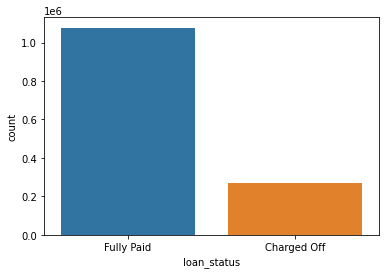

In [ ]:
sns.countplot(df['loan_status'], data = df)

In [ ]:
df.isnull().sum()/len(df) * 100

id                         0.000000
member_id                100.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
                            ...    
settlement_status         97.526518
settlement_date           97.526518
settlement_amount         97.526518
settlement_percentage     97.526518
settlement_term           97.526518
Length: 151, dtype: float64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150]),
 <a list of 151 Text major ticklabel objects>)

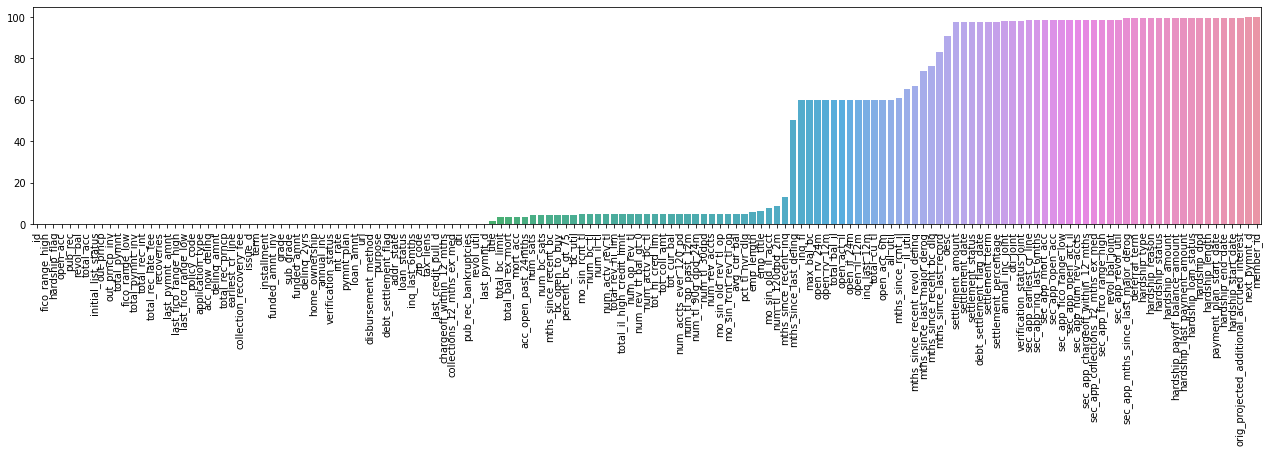

In [ ]:
plt.figure(figsize=(22,4))
sns.barplot(x=((df.isnull().sum()/len(df))*100).sort_values().index,y=((df.isnull().sum()/len(df))*100).sort_values()) 
plt.xticks(rotation=90)

In [ ]:
col = df.columns[((df.isnull().sum()/len(df))*100 < 40)].to_list()

In [ ]:
df = df[col]

In [ ]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'a

In [ ]:
features = ['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'application_type',
                    'initial_list_status', 'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'loan_status', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 
                    'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status']

In [ ]:
df = df[features]

In [ ]:
df.dtypes

addr_state               object
annual_inc              float64
earliest_cr_line         object
emp_length               object
emp_title                object
fico_range_high         float64
fico_range_low          float64
grade                    object
home_ownership           object
application_type         object
initial_list_status      object
int_rate                float64
loan_amnt               float64
num_actv_bc_tl          float64
loan_status              object
mort_acc                float64
tot_cur_bal             float64
open_acc                float64
pub_rec                 float64
pub_rec_bankruptcies    float64
purpose                  object
revol_bal               float64
revol_util              float64
sub_grade                object
term                     object
title                    object
total_acc               float64
verification_status      object
dtype: object

In [ ]:
df_corr = df.copy()

In [ ]:
 pd.get_dummies(df_corr['loan_status'], drop_first=True)

In [ ]:
df_corr['loan_status'] = pd.get_dummies(df_corr['loan_status'], drop_first=True)

In [ ]:
df_corr.corr()['loan_status'].sort_values()

int_rate               -0.258792
loan_amnt              -0.065604
revol_util             -0.060048
num_actv_bc_tl         -0.041598
open_acc               -0.028078
pub_rec                -0.026194
pub_rec_bankruptcies   -0.025308
total_acc               0.011300
revol_bal               0.020010
annual_inc              0.041759
tot_cur_bal             0.071206
mort_acc                0.075294
fico_range_high         0.130682
fico_range_low          0.130683
loan_status             1.000000
Name: loan_status, dtype: float64

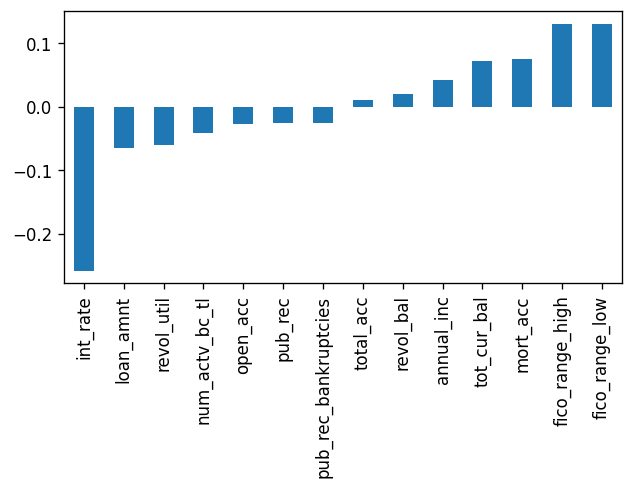

In [ ]:
plt.figure(figsize=(6,3),dpi=120)
df_corr.corr()['loan_status'].sort_values().drop('loan_status').plot(kind='bar')
plt.xticks(rotation=90);

In [ ]:
(df.isnull().sum()/len(df))[df.isnull().sum()/len(df) * 100 > 0]

emp_length              0.058359
emp_title               0.063766
num_actv_bc_tl          0.050194
mort_acc                0.035145
tot_cur_bal             0.050194
pub_rec_bankruptcies    0.000518
revol_util              0.000637
title                   0.012383
dtype: float64

In [ ]:
df.addr_state.unique()

array(['PA', 'SD', 'IL', 'GA', 'MN', 'SC', 'RI', 'NC', 'CA', 'VA', 'AZ',
       'IN', 'MD', 'NY', 'TX', 'KS', 'NM', 'AL', 'WA', 'OH', 'LA', 'FL',
       'CO', 'MI', 'MO', 'DC', 'MA', 'WI', 'HI', 'VT', 'NJ', 'DE', 'TN',
       'NH', 'NE', 'OR', 'CT', 'AR', 'NV', 'WV', 'MT', 'WY', 'OK', 'KY',
       'MS', 'UT', 'ND', 'ME', 'AK', 'ID', 'IA'], dtype=object)

In [ ]:
state_dummies = pd.get_dummies(df['addr_state'], drop_first=True)
state_dummies

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2260690,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2260691,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2260692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([df.drop('addr_state', axis=1), state_dummies], axis=1)

In [ ]:
df['annual_inc'].describe()

count    1.345310e+06
mean     7.624764e+04
std      6.992510e+04
min      0.000000e+00
25%      4.578000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

In [ ]:
df['annual_inc'].describe().apply(lambda x: format(x, 'f'))

count     1345310.000000
mean        76247.636414
std         69925.098427
min             0.000000
25%         45780.000000
50%         65000.000000
75%         90000.000000
max      10999200.000000
Name: annual_inc, dtype: object

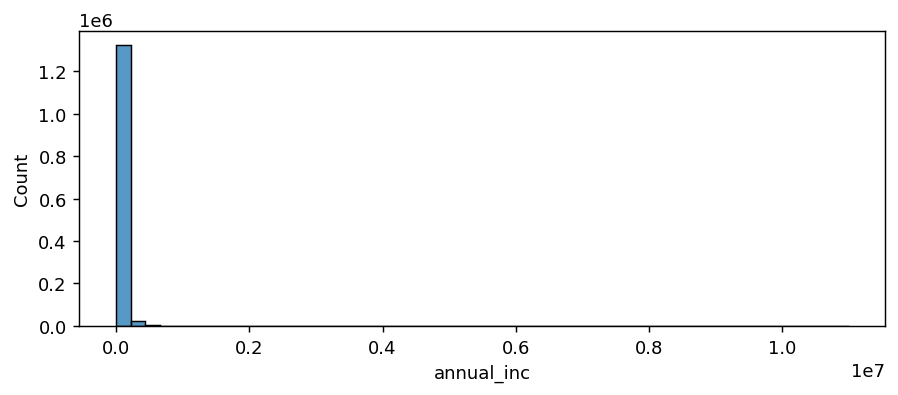

In [ ]:
plt.figure(figsize=(8,3), dpi=130)
sns.histplot(x=df['annual_inc'], bins = 50)

In [ ]:
df = df[df['annual_inc'] <= 160000]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


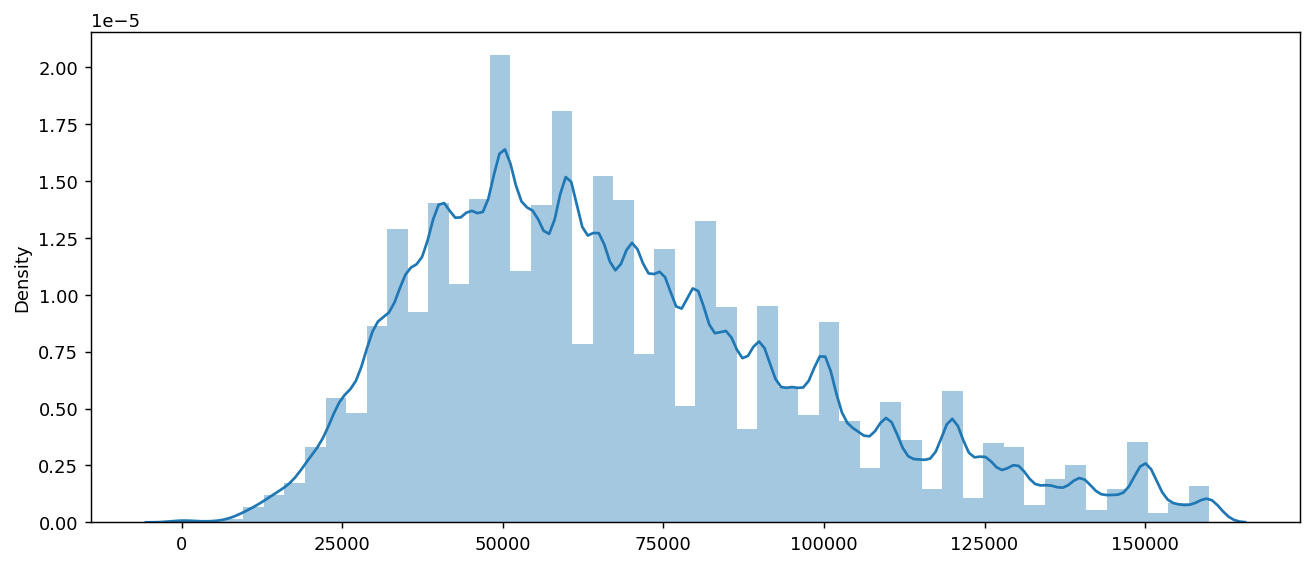

In [ ]:
plt.figure(figsize=(12,5), dpi=130)
sns.distplot(x=df['annual_inc']);

In [ ]:
df.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,259996.0,64706.797079,29699.248360,0.0,42500.0,60000.0,80000.0,160000.0
Fully Paid,1026052.0,69353.710659,31084.447987,0.0,45400.0,64900.0,88000.0,160000.0


In [ ]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [ ]:
df.groupby('loan_status')['earliest_cr_line'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,259996.0,1999.459472,7.549854,1944.0,1996.0,2001.0,2005.0,2015.0
Fully Paid,1026052.0,1998.698935,7.553672,1934.0,1995.0,2000.0,2004.0,2015.0


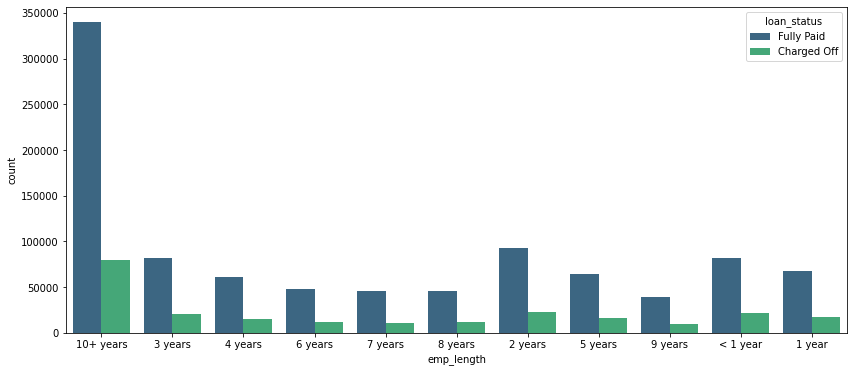

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(x='emp_length',data=df,hue='loan_status', palette='viridis')

In [ ]:
charged_off = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [ ]:
percentage= (charged_off * 100)/(charged_off + fully_paid)
percentage

emp_length
1 year       20.789269
10+ years    19.091639
2 years      20.034588
3 years      20.207794
4 years      19.933114
5 years      19.745968
6 years      19.574255
7 years      19.721203
8 years      20.160762
9 years      20.132122
< 1 year     20.736945
Name: loan_status, dtype: float64

In [ ]:
df = df.drop('emp_length', axis=1)
df = df.drop('emp_title', axis=1)

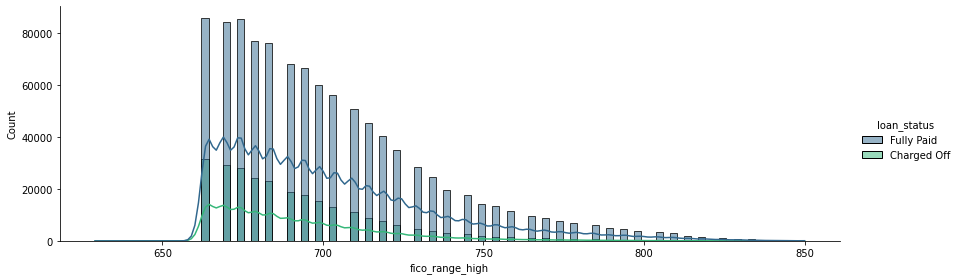

In [ ]:
sns.displot(data=df, x='fico_range_high', hue='loan_status', bins=100, height=4, aspect=3, kde=True, palette='viridis')

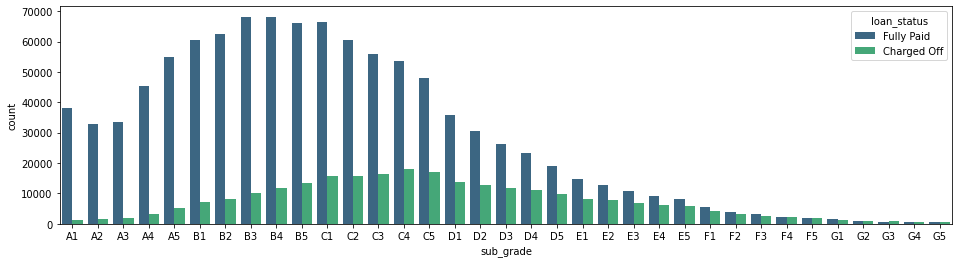

In [ ]:
plt.figure(figsize=(16,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='viridis' ,hue='loan_status')

In [ ]:
df = df.drop('grade', axis=1)

In [ ]:
dummies_sub_grade = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df.drop('sub_grade', axis=1), dummies_sub_grade], axis=1)

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    625290
RENT        521498
OWN         138802
ANY            271
OTHER          139
NONE            48
Name: home_ownership, dtype: int64

In [ ]:
df['home_ownership'] = df['home_ownership'].replace(['ANY', 'NONE'], 'OTHER')

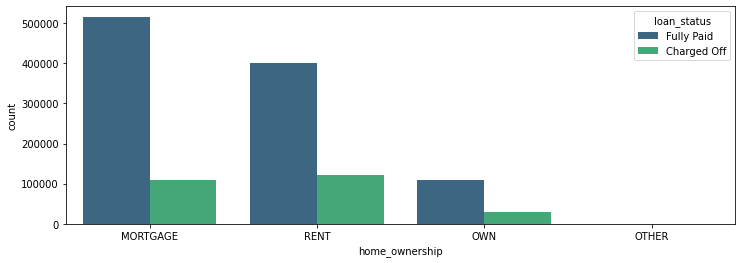

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='home_ownership',data=df,hue='loan_status', palette='viridis')

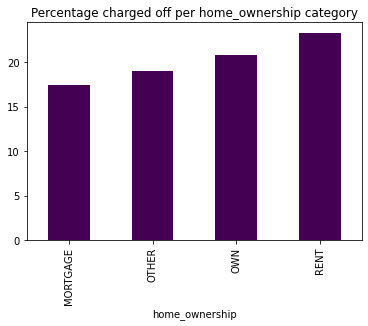

In [ ]:
chargedoff = df[df.loan_status == 'Charged Off'].groupby('home_ownership')['loan_status'].count()
fullypaid =  df[df.loan_status == 'Fully Paid'].groupby('home_ownership')['loan_status'].count()

percentage_charged_off = (chargedoff * 100)/(chargedoff + fullypaid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per home_ownership category");

In [ ]:
dummies_home_ownership = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df.drop('home_ownership', axis=1), dummies_home_ownership], axis=1)

In [ ]:
df['application_type'].value_counts()

Individual    1260656
Joint App       25392
Name: application_type, dtype: int64

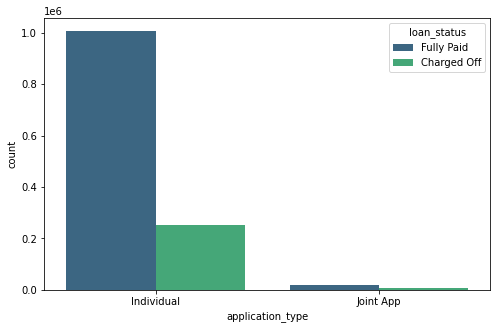

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='application_type',data=df,hue='loan_status', palette='viridis')

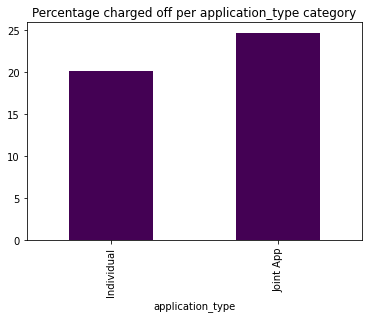

In [ ]:
charged_off = df[df['loan_status']=="Charged Off"].groupby("application_type").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("application_type").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per application_type category");

In [ ]:
dummies_application_type = pd.get_dummies(df['application_type'], drop_first=True)
df = pd.concat([df.drop('application_type', axis=1), dummies_application_type], axis=1)

In [ ]:
df['initial_list_status'].value_counts()

w    746083
f    539965
Name: initial_list_status, dtype: int64

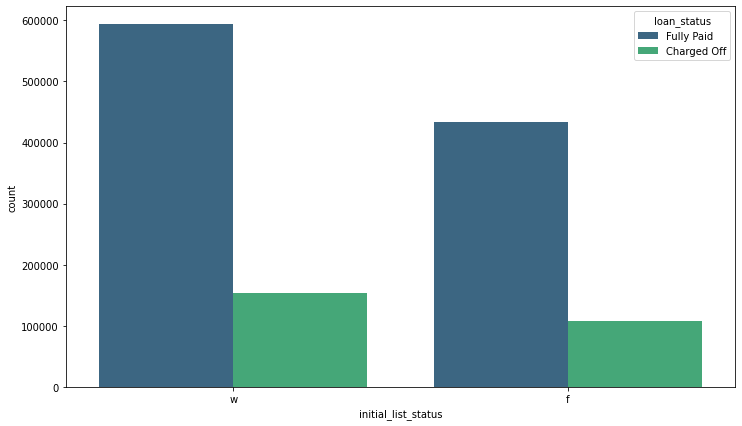

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(x='initial_list_status',data=df,hue='loan_status', palette='viridis')

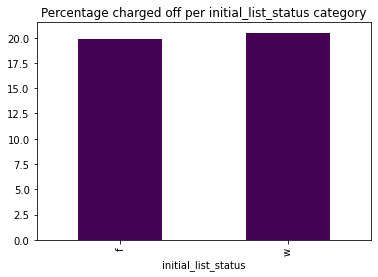

In [ ]:
charged_off = df[df['loan_status']=="Charged Off"].groupby("initial_list_status").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("initial_list_status").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per initial_list_status category");

In [ ]:
df = df.drop('initial_list_status', axis=1)

In [ ]:
df['int_rate'].describe()

count    1.286048e+06
mean     1.329400e+01
std      4.756908e+00
min      5.310000e+00
25%      9.760000e+00
50%      1.279000e+01
75%      1.602000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

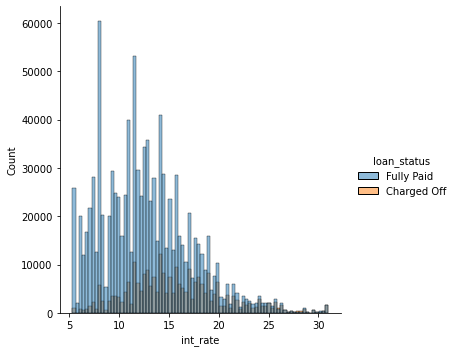

In [ ]:
sns.displot(data = df ,x = 'int_rate',hue= 'loan_status', bins = 80)

In [ ]:
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,259996.0,15.741744,4.902785,5.31,12.35,15.05,18.55,30.99
Fully Paid,1026052.0,12.673758,4.513117,5.31,9.17,12.29,15.31,30.99


In [ ]:
df['loan_amnt'].describe()

count    1.286048e+06
mean     1.398954e+04
std      8.415446e+03
min      5.000000e+02
25%      7.500000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,259996.0,15237.069032,8596.828429,900.0,8775.0,14000.0,20000.0,40000.0
Fully Paid,1026052.0,13673.417892,8339.280301,500.0,7200.0,12000.0,19000.0,40000.0


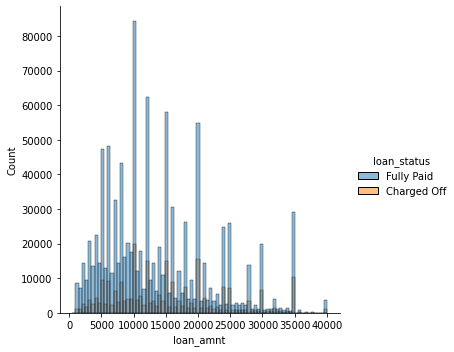

In [ ]:
import math
sns.displot(data = df ,x = 'loan_amnt',hue= 'loan_status', bins = 80)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


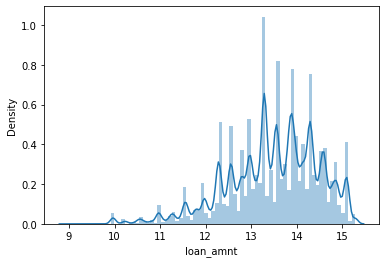

In [ ]:
sns.distplot(df['loan_amnt'].apply(lambda x: math.log2(x)), bins = 80)

In [ ]:
df['num_actv_bc_tl'].describe()

count    1.220610e+06
mean     3.607978e+00
std      2.217864e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      3.500000e+01
Name: num_actv_bc_tl, dtype: float64

In [ ]:
df['num_actv_bc_tl'] = df['num_actv_bc_tl'].fillna(4)

In [ ]:
df = df[df['num_actv_bc_tl'] < 10]

In [ ]:
df.groupby('loan_status')['num_actv_bc_tl'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,253643.0,3.613851,1.935446,0.0,2.0,3.0,5.0,9.0
Fully Paid,1008574.0,3.444579,1.845367,0.0,2.0,3.0,4.0,9.0


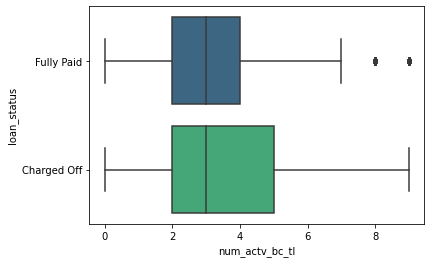

In [ ]:
sns.boxplot(data=df, y='loan_status', x='num_actv_bc_tl', palette='viridis')

In [ ]:
df['mort_acc'].describe().apply(lambda x: format(x, 'f'))

count    1216454.000000
mean           1.599580
std            1.938027
min            0.000000
25%            0.000000
50%            1.000000
75%            3.000000
max           51.000000
Name: mort_acc, dtype: object

In [ ]:
df['mort_acc'] = df['mort_acc'].fillna(2)

In [ ]:
df = df[df['mort_acc'] < 8]

In [ ]:
df.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,251687.0,1.284647,1.621528,0.0,0.0,1.0,2.0,7.0
Fully Paid,996309.0,1.589307,1.740202,0.0,0.0,1.0,3.0,7.0


In [ ]:
df['total_acc'].describe().apply(lambda x: format(x, 'f'))

count    1247996.000000
mean          24.289934
std           11.612312
min            2.000000
25%           16.000000
50%           23.000000
75%           31.000000
max          176.000000
Name: total_acc, dtype: object

In [ ]:
df = df[df['total_acc'] < 54]

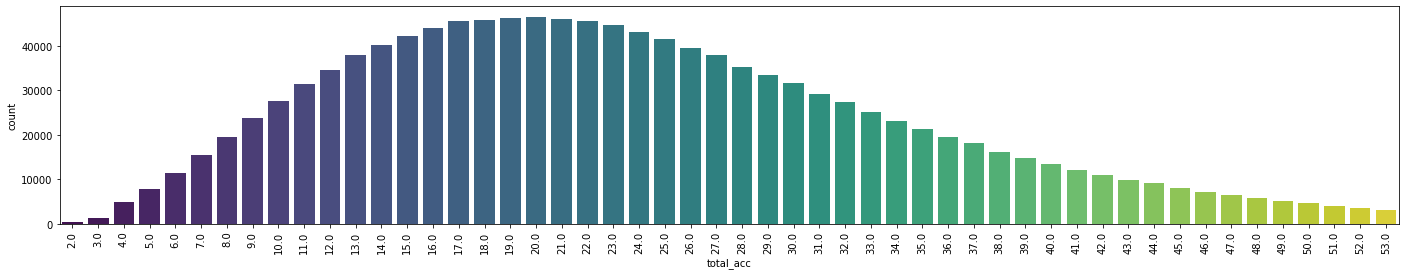

In [ ]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='total_acc', palette='viridis');

In [ ]:
df.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,246614.0,23.301796,10.446479,2.0,15.0,22.0,30.0,53.0
Fully Paid,976866.0,23.607038,10.376113,2.0,16.0,22.0,30.0,53.0


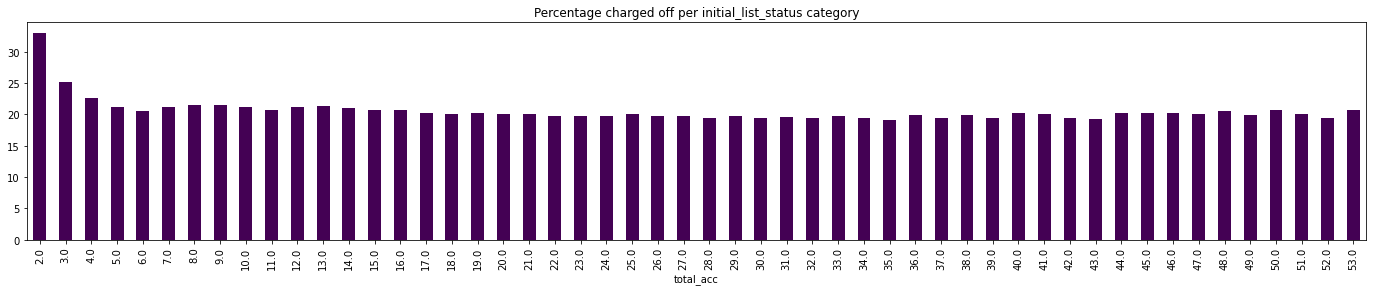

In [ ]:
charged_off = df[df['loan_status']=="Charged Off"].groupby("total_acc").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("total_acc").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
plt.figure(figsize=(24,4))
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per total_acc category");

In [ ]:
df = df.drop('total_acc', axis=1)

In [ ]:
df['tot_cur_bal'].describe().apply(lambda x: format(x, 'f'))

count    1159137.000000
mean      124513.141258
std       128874.441449
min            0.000000
25%        27525.000000
50%        69858.000000
75%       192169.000000
max      2230255.000000
Name: tot_cur_bal, dtype: object

In [ ]:
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(df['tot_cur_bal'].mean())

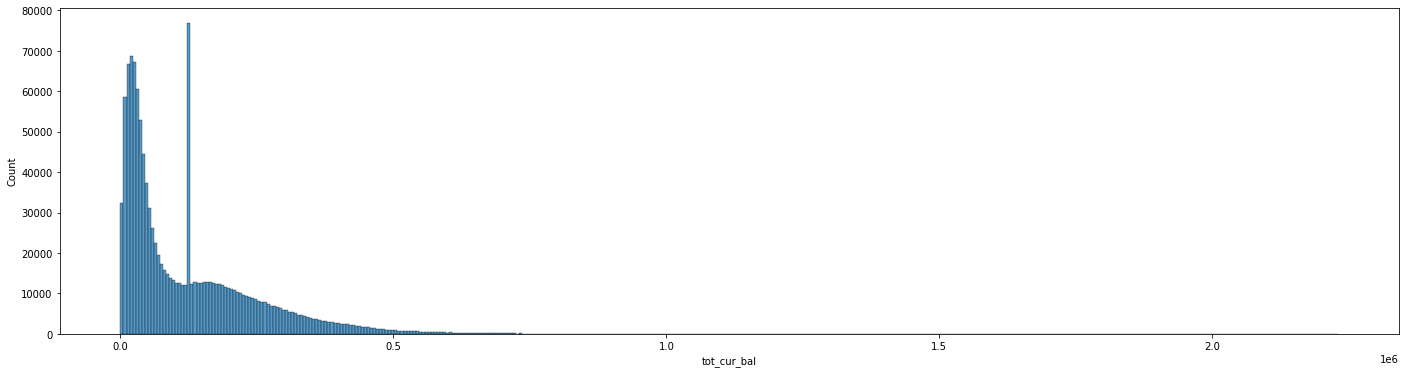

In [ ]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='tot_cur_bal', bins=400, palette='viridis')

In [ ]:
df = df[df['tot_cur_bal'] < 500001]

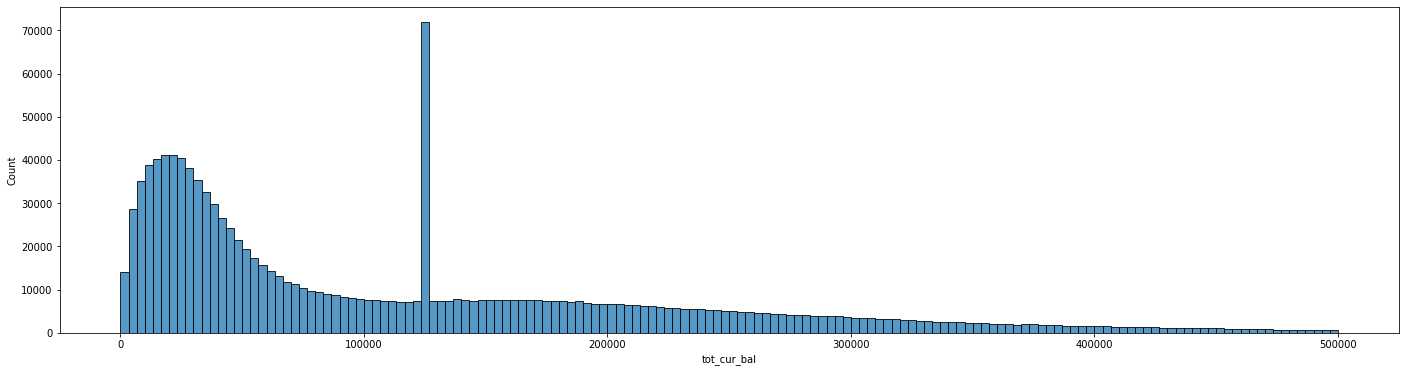

In [ ]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='tot_cur_bal', bins=150, palette='viridis')

In [ ]:
df.groupby('loan_status')['tot_cur_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,244262.0,103566.945866,103262.966085,0.0,26737.0,59390.5,151226.25,499994.0
Fully Paid,961361.0,120840.776621,112179.891670,0.0,29106.0,83989.0,184839.00,499999.0


In [ ]:
df.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,244262.0,11.305283,4.956990,0.0,8.0,11.0,14.0,49.0
Fully Paid,961361.0,10.954106,4.806693,0.0,7.0,10.0,14.0,48.0


In [ ]:
df['pub_rec'].describe().apply(lambda x: format(x, 'f'))

count    1205623.000000
mean           0.217257
std            0.594947
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max           86.000000
Name: pub_rec, dtype: object

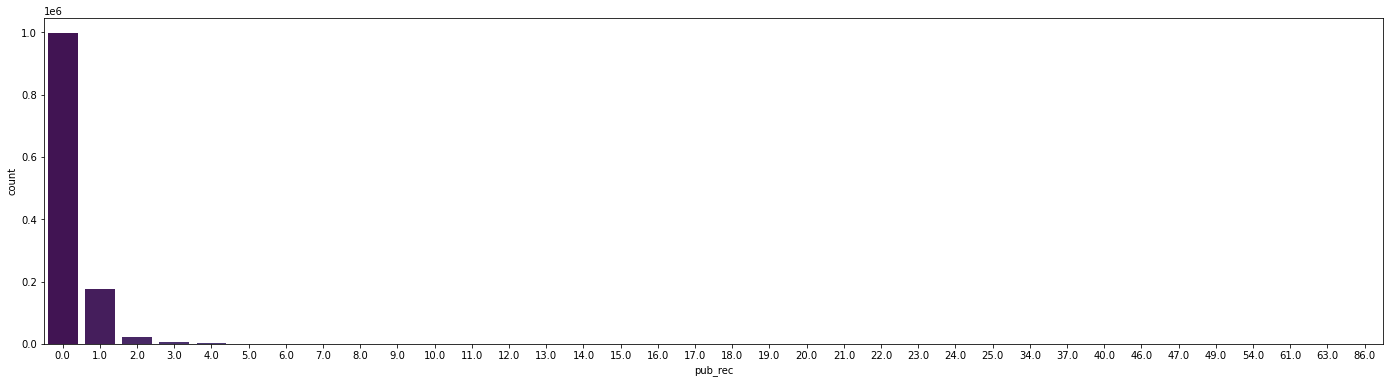

In [ ]:
plt.figure(figsize=(24,6))
sns.countplot(data=df, x='pub_rec', palette='viridis');

In [ ]:
df.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,244262.0,0.247095,0.654601,0.0,0.0,0.0,0.0,86.0
Fully Paid,961361.0,0.209676,0.578566,0.0,0.0,0.0,0.0,63.0


In [ ]:
df = df[df['pub_rec'] < 2]

In [ ]:
df.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,236493.0,0.168449,0.374265,0.0,0.0,0.0,0.0,1.0
Fully Paid,936265.0,0.144744,0.351843,0.0,0.0,0.0,0.0,1.0


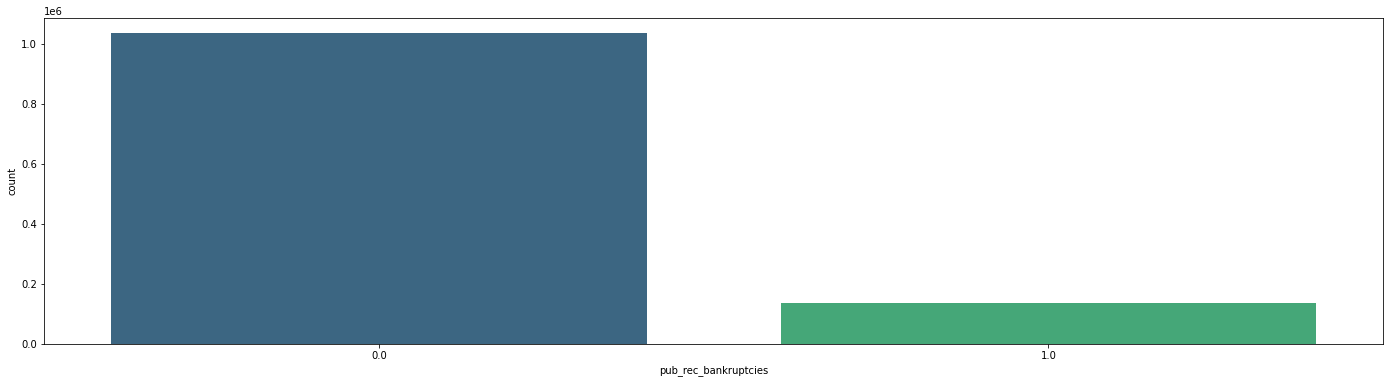

In [ ]:
plt.figure(figsize=(24,6))
sns.countplot(data=df, x='pub_rec_bankruptcies', palette='viridis');

In [ ]:
abs(df.corr()['pub_rec_bankruptcies']).sort_values(ascending=False)[1:5]

pub_rec     0.867898
int_rate    0.049935
MI          0.025382
CA          0.024266
Name: pub_rec_bankruptcies, dtype: float64

In [ ]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1., nan])

In [ ]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)

In [ ]:
df.groupby('loan_status')['pub_rec_bankruptcies'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,236493.0,0.130427,0.336773,0.0,0.0,0.0,0.0,1.0
Fully Paid,936265.0,0.113524,0.317233,0.0,0.0,0.0,0.0,1.0


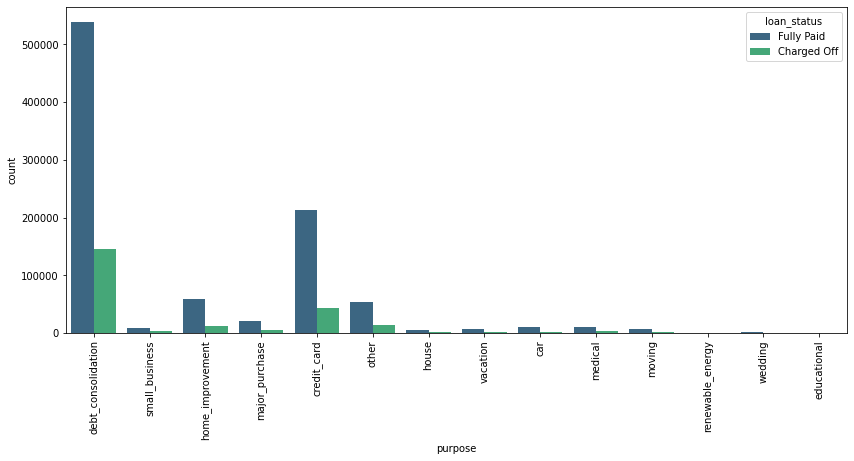

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='purpose', hue='loan_status', palette='viridis');
plt.xticks(rotation=90);

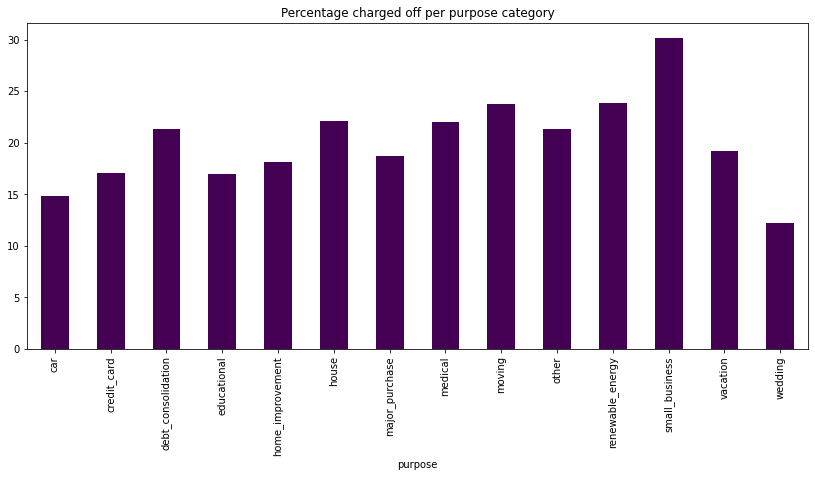

In [ ]:
plt.figure(figsize=(14,6))
charged_off = df[df['loan_status']=="Charged Off"].groupby("purpose").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("purpose").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per purpose category");

In [ ]:
dummies_purpose = pd.get_dummies(df['purpose'], drop_first=True)
df = pd.concat([df.drop('purpose', axis=1), dummies_purpose], axis=1)

In [ ]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
df['term'] = df['term'].apply(lambda x: int(x[0:3]))

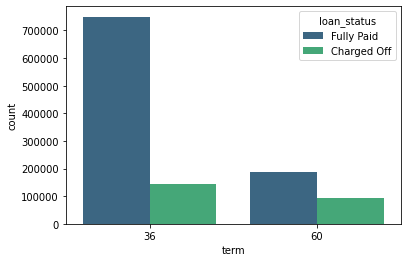

In [ ]:
sns.countplot(data=df, x='term', palette='viridis', hue='loan_status')

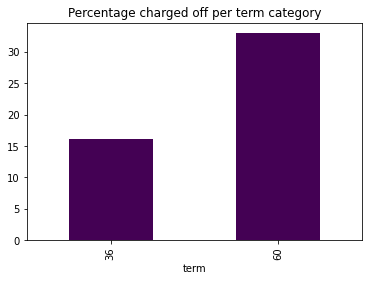

In [ ]:
charged_off = df[df['loan_status']=="Charged Off"].groupby("term").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("term").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per term category");

In [ ]:
df['term'].describe()

In [ ]:
dummies_term = pd.get_dummies(df['term'], drop_first=True)
df = pd.concat([df.drop('term', axis=1), dummies_term], axis=1)

In [ ]:
df = df.drop('title', axis=1)

In [ ]:
df['revol_bal'].describe().apply(lambda x: format(x,'f'))

count    1172758.000000
mean       14192.662090
std        14488.081912
min            0.000000
25%         5735.000000
50%        10567.000000
75%        18187.000000
max       491712.000000
Name: revol_bal, dtype: object

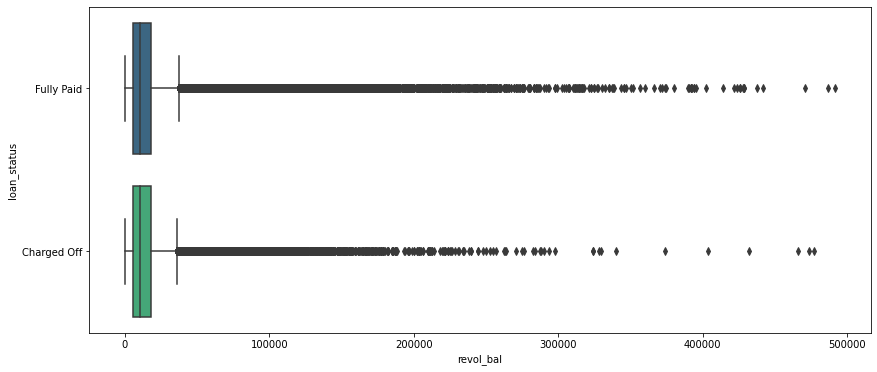

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, y='loan_status', x='revol_bal', palette='viridis')

In [ ]:
len(df[df['revol_bal'] > 70000]) * 100 / len(df)

0.8471483460355845

In [ ]:
df = df[df['revol_bal'] < 70000]

In [ ]:
df.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,234925.0,13267.817835,10583.902513,0.0,5785.0,10543.0,17710.0,69990.0
Fully Paid,927898.0,13424.396604,10962.381212,0.0,5675.0,10455.0,17954.0,69999.0


In [ ]:
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())

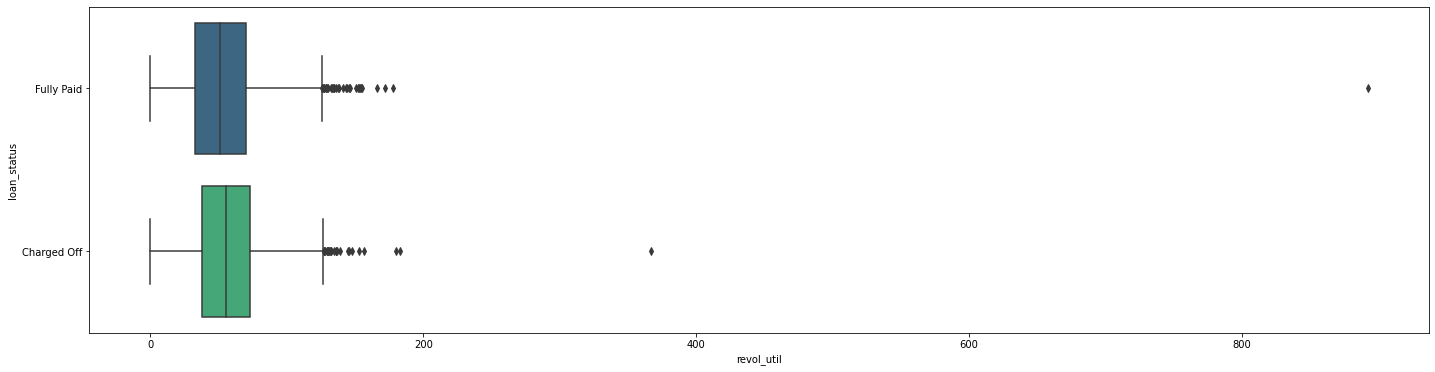

In [ ]:
plt.figure(figsize=(24,6))
sns.boxplot(data=df, x='revol_util', y = 'loan_status', palette='viridis');

In [ ]:
df['revol_util'].describe().apply(lambda x: format(x, 'f'))

count    1162823.000000
mean          51.801784
std           24.466927
min            0.000000
25%           33.500000
50%           52.100000
75%           70.600000
max          892.300000
Name: revol_util, dtype: object

In [ ]:
df = df[df['revol_util'] < 150]

In [ ]:
df.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,234920.0,54.82340,23.863215,0.0,37.5,55.6,73.2,148.0
Fully Paid,927888.0,51.03399,24.537451,0.0,32.6,51.3,69.9,146.1


In [ ]:
df['verification_status'].value_counts()

Source Verified    443897
Not Verified       366247
Verified           352664
Name: verification_status, dtype: int64

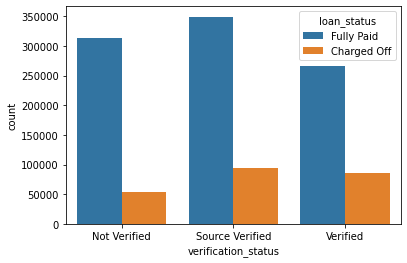

In [ ]:
sns.countplot(data = df, x  = 'verification_status', hue = 'loan_status')

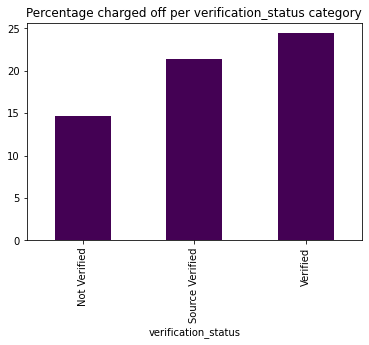

In [ ]:
charged_off = df[df['loan_status']=="Charged Off"].groupby("verification_status").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("verification_status").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per verification_status category");

In [ ]:
dummies = pd.get_dummies(df['verification_status'], drop_first=True)
df = pd.concat([df.drop('verification_status', axis = 1), dummies], axis = 1)

In [ ]:
df['loan_status'].value_counts()

Fully Paid     927888
Charged Off    234920
Name: loan_status, dtype: int64

In [ ]:
df['loan_status'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off':0})

In [ ]:
df['loan_status'].value_counts()

1    927888
0    234920
Name: loan_status, dtype: int64

In [ ]:
# def test(value):
#   if value ==1:
#     return 'Fardin'
#   if value == 0:
#     return 'Mar'

# pd.concat([df['loan_status'], df['loan_status'].apply(test)], axis = 1)

,loan_status,loan_status
0,1,Fardin
1,1,Fardin
2,1,Fardin
4,1,Fardin
5,1,Fardin
...,...,...
2260672,0,Mar
2260673,0,Mar
2260685,0,Mar
2260688,1,Fardin


In [ ]:
df.shape 

(1162808, 119)

In [ ]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [ ]:
preds = model.predict(X_test) 
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.57      0.05      0.09     35167
           1       0.80      0.99      0.89    139255

    accuracy                           0.80    174422
   macro avg       0.69      0.52      0.49    174422
weighted avg       0.76      0.80      0.73    174422



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


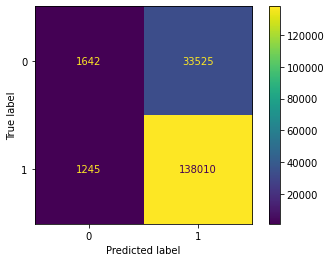

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

model = Sequential()

# input layer
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.1))

# hidden layer
model.add(Dense(64,  activation='relu'))
model.add(Dropout(0.1))

# hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

# hidden layer
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=10,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/10
3861/3861 [==============================] - 25s 6ms/step - loss: 0.4641 - val_loss: 0.4564
Epoch 2/10
3861/3861 [==============================] - 21s 5ms/step - loss: 0.4589 - val_loss: 0.4549
Epoch 3/10
3861/3861 [==============================] - 21s 5ms/step - loss: 0.4575 - val_loss: 0.4544
Epoch 4/10
3861/3861 [==============================] - 22s 6ms/step - loss: 0.4565 - val_loss: 0.4542
Epoch 5/10
3861/3861 [==============================] - 22s 6ms/step - loss: 0.4559 - val_loss: 0.4540
Epoch 6/10
3861/3861 [==============================] - 21s 6ms/step - loss: 0.4553 - val_loss: 0.4535
Epoch 7/10
3861/3861 [==============================] - 21s 5ms/step - loss: 0.4549 - val_loss: 0.4534
Epoch 8/10
3861/3861 [==============================] - 21s 6ms/step - loss: 0.4545 - val_loss: 0.4540
Epoch 9/10
3861/3861 [==============================] - 21s 5ms/step - loss: 0.4541 - val_loss: 0.4538
Epoch 10/10
3861/3861 [==============================] - 22s 6ms/step - l

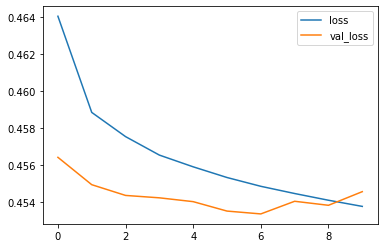

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
model.predict(X_test)

array([[0.75251335],
       [0.6966779 ],
       [0.79546106],
       ...,
       [0.89675105],
       [0.6964766 ],
       [0.8108958 ]], dtype=float32)

In [ ]:
predictions = (model.predict(X_test) > 0.6).astype("int32")
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.49      0.20      0.28     35167
           1       0.82      0.95      0.88    139255

    accuracy                           0.80    174422
   macro avg       0.66      0.57      0.58    174422
weighted avg       0.76      0.80      0.76    174422



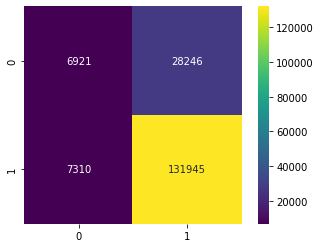

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
f = sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', square=True) #plot_confusion_matri